In [101]:
from yaml import load, Loader
import pandas as pd
from util.analysis_utils import get_all_results, merge_results_patients, prep_patients_df, plot_exps

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
og_df = pd.read_csv('/vol/aimspace/projects/ukbb/data/tabular/ukb668815_imaging.csv')
patients_df = prep_patients_df(og_df)

/tmp/ipykernel_2912865/1831496144.py:1: DtypeWarning: Columns (20,68,1186,1187,1188,1258,1259,1260,1552,2745,2746,2747,2748,2749,2750,2751,2752,2753,2754,2755,2756,2757,2758,2759,2760,2761,2762,2763,2764,2765,2766,2767,2768,2769,2770,2771,2772,2773,2774,2775,2776,2777,2778,2779,2780,2781,2782,2783,2784,2785,2786,2787,2788,2789,2790,2791,2792,2793,2794,2795,2796,2797,2856,2857,2858,2859,2860,2861,2862,2863,2864,2865,2866,2867,2868,2869,2870,2871,2872,2873,2874,2875,2876,2877,2878,2879,2880,2881,2882,2883,2884,2885,2886,2887,2888,2889,2890,2891,2892,2893,2894,2895,2896,2897,2898,2899,2900,2901,2902,2903,2904,2905,2906,2907,2908,2909,2910,2911,2912,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000,3001,3002,3003,3004,3005,3006,3007,3008,3009,3010,3011,3012,3013,3014,3015,3016,3017,3018,3019,3020,3021,3022,3023,3024,3025,3084,3085,3086,3087,3088,3089,3090,3091,3092,3093,3094,3095,3096,3097,3098,3099,3

In [90]:
columns = ['experiment', 'model', 'train_set', 'test_set', 'epochs', 'dice_mean', 'rv_mean', 'myo_mean', 'lv_mean', 'male_dice', 'female_dice', 'white_dice', 'asian_dice', 'black_dice', 'low_scores_prcnt']
exps_df = pd.DataFrame(columns=columns)

# Experiment 1: Baseline Model - 330
## Sex Controlled Test Set Results

Unimatch Unet 330 Pretrained on UKBB
UKBB Test Data - Sex Controlled -  962 Patients
Number of Patients: 962
Total number of slices: 20802
DICE Mean: 92.19
RV Mean: 90.82
MYO Mean: 90.85
LV Mean: 94.91


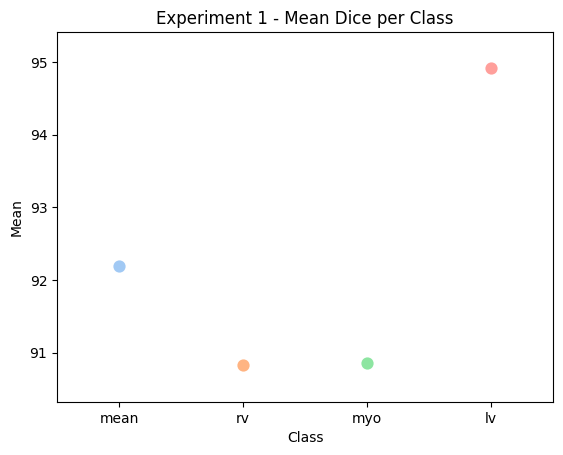

Dice Mean for Male: 92.19
Dice Mean for Female: 92.20


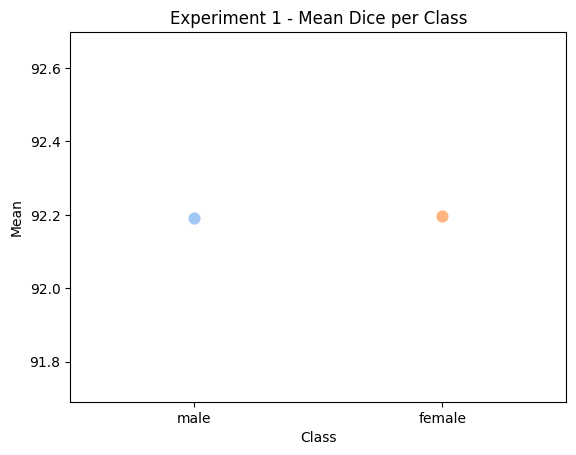

Mean Dice for White:
   ethnicity  dice_mean
0     1001.0  92.387895
1     1002.0  93.030053
2     1003.0  91.992282
Mean: 92.38789520166718
Mean Dice for Asian:
   ethnicity  dice_mean
0     3001.0  91.027562
1     3002.0  91.540833
2     3004.0  92.589511
Mean: 91.02756206061161
Mean Dice for Black:
   ethnicity  dice_mean
0     4001.0  91.068725
1     4002.0  91.075574
2     4003.0  90.802458
Mean: 91.06872545963455


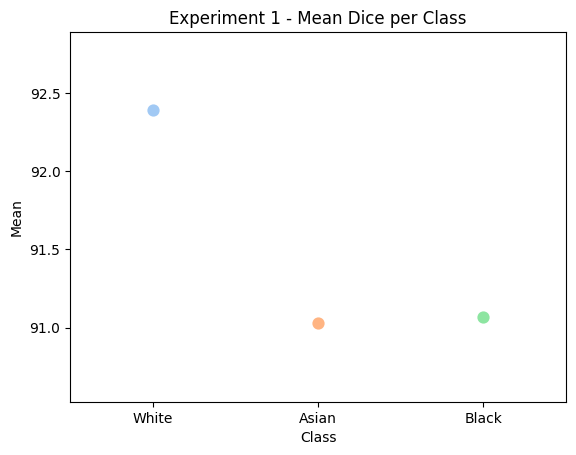

Experiment 1 - Number of slices with DICE < 50.0%: 566


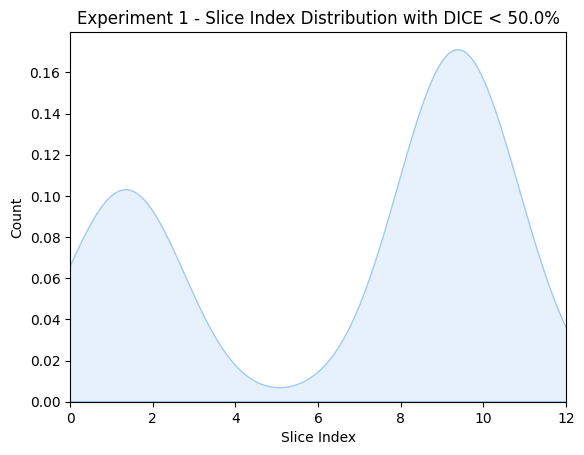

/tmp/ipykernel_2912865/2632780828.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  exps_df = pd.concat([exps_df, res_df], ignore_index=True)


In [91]:
cfg = load(open('configs/ukbb/test/exp1/sex.yaml', 'r'), Loader=Loader)
test_sex_df = pd.read_csv(cfg['results_path'])
print(cfg['model_desc'])
print(cfg['data_desc'])
test_sex_merged_df = merge_results_patients(test_sex_df, patients_df)
res_df = get_all_results(test_sex_merged_df, cfg)
exps_df = pd.concat([exps_df, res_df], ignore_index=True)

Train no control, test sex controlled. Results for sex groups although females count is higher (almost similar). However, results for white ethnic group is a bit higher due to the higher number of train samples for this group.

Most slices with low scores are either near the apex or the base where the segmentation ground truth is not meaningful for the task.

## Ethnicity Controlled Test Set Results

Unimatch Unet 330 Pretrained on UKBB
UKBB Test Data - Ethnicity Controlled -  108 Patients


Number of Patients: 108
Total number of slices: 2300
DICE Mean: 91.11
RV Mean: 89.62
MYO Mean: 89.56
LV Mean: 94.14


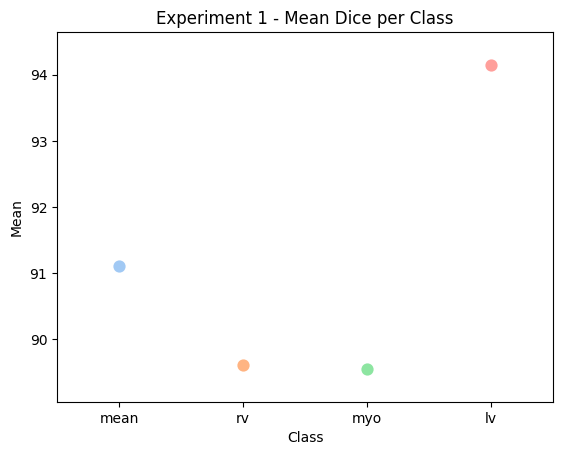

Dice Mean for Male: 91.56
Dice Mean for Female: 90.64


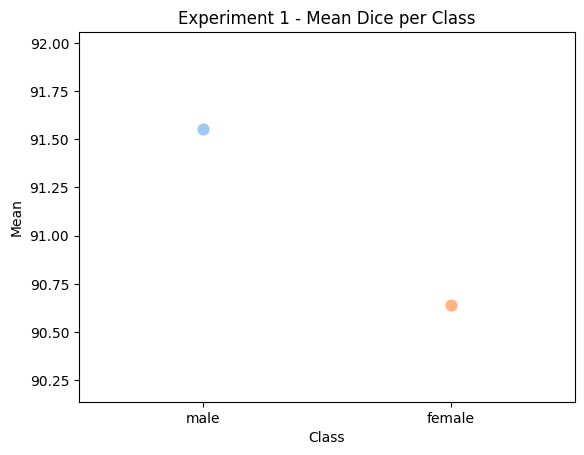

Mean Dice for White:
   ethnicity  dice_mean
0     1001.0  90.748787
1     1003.0  93.223375
Mean: 90.7487866002082
Mean Dice for Asian:
   ethnicity  dice_mean
0     3001.0  90.342943
1     3002.0  92.628563
2     3003.0  93.353328
3     3004.0  92.298133
Mean: 90.34294284146524
Mean Dice for Black:
   ethnicity  dice_mean
0     4001.0  90.774393
1     4002.0  92.641555
2     4003.0  90.802458
Mean: 90.77439278802615


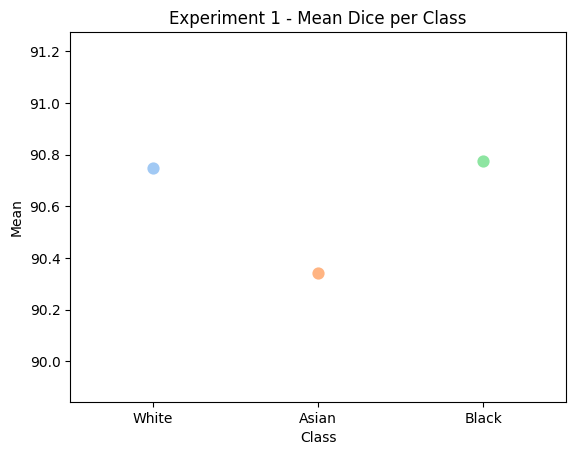

Experiment 1 - Number of slices with DICE < 50.0%: 84


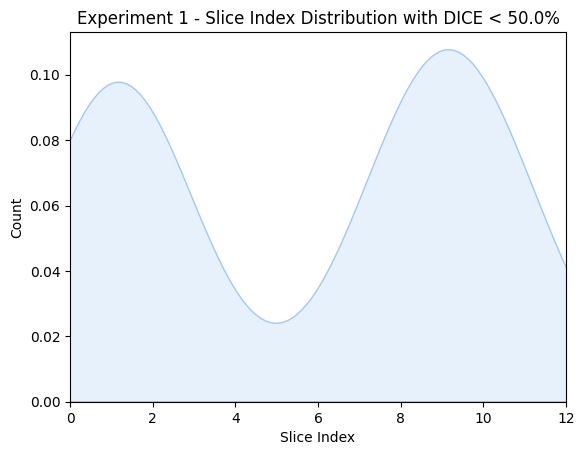

In [92]:
cfg = load(open('configs/ukbb/test/exp1/ethn.yaml', 'r'), Loader=Loader)
print(cfg['model_desc'])
print(cfg['data_desc'])
test_ethn_df = pd.read_csv(cfg['results_path'])
test_ethn_merged_df = merge_results_patients(test_ethn_df, patients_df)
res_df = get_all_results(test_ethn_merged_df, cfg)
exps_df = pd.concat([exps_df, res_df], ignore_index=True)

Train no control, test ethnicity controlled. Results for female group is lower although the training set contains more females than males. Results for ethnic groups are similar.

# Experiment 2: Sex Controlled Model - 80
## Sex Controlled Test Set Results

Unimatch Unet 80 Pretrained on UKBB
UKBB Test Data - Sex Controlled -  962 Patients
Number of Patients: 962
Total number of slices: 20802
DICE Mean: 89.17
RV Mean: 87.01
MYO Mean: 87.69
LV Mean: 92.80


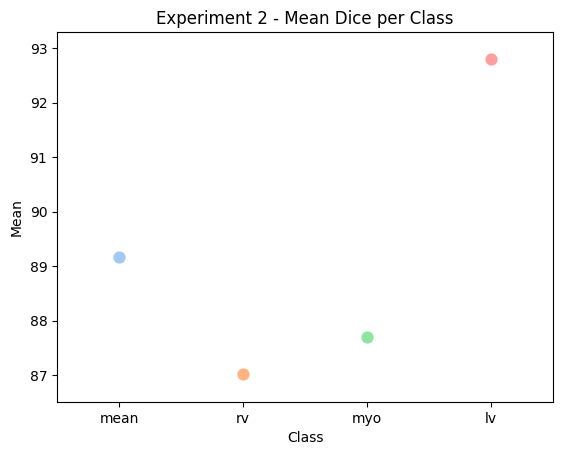

Dice Mean for Male: 89.24
Dice Mean for Female: 89.10


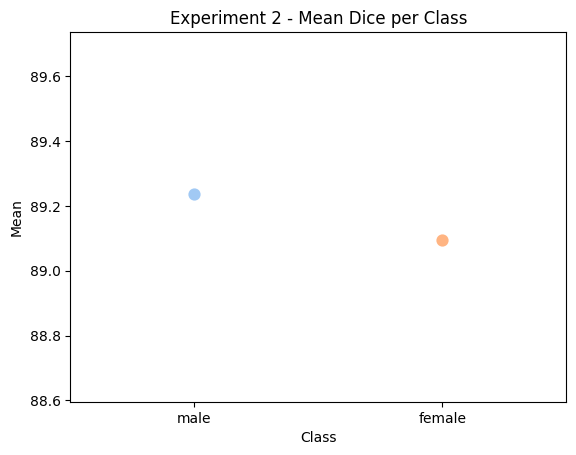

Mean Dice for White:
   ethnicity  dice_mean
0     1001.0  89.403407
1     1002.0  89.770477
2     1003.0  88.191612
Mean: 89.40340726472132
Mean Dice for Asian:
   ethnicity  dice_mean
0     3001.0  88.419775
1     3002.0  88.291862
2     3004.0  88.717217
Mean: 88.4197751533251
Mean Dice for Black:
   ethnicity  dice_mean
0     4001.0  87.683266
1     4002.0  87.797849
2     4003.0  84.909636
Mean: 87.68326627332618


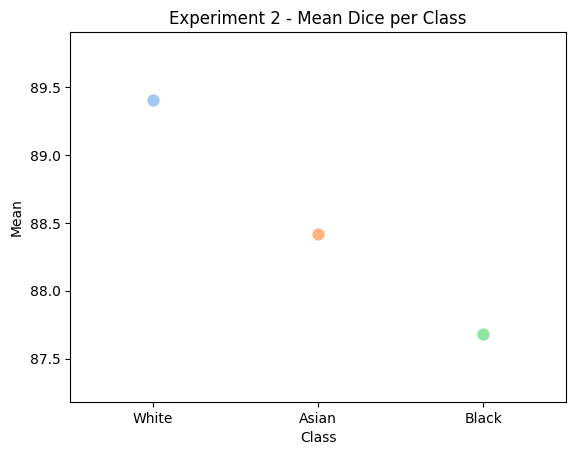

Experiment 2 - Number of slices with DICE < 50.0%: 1089


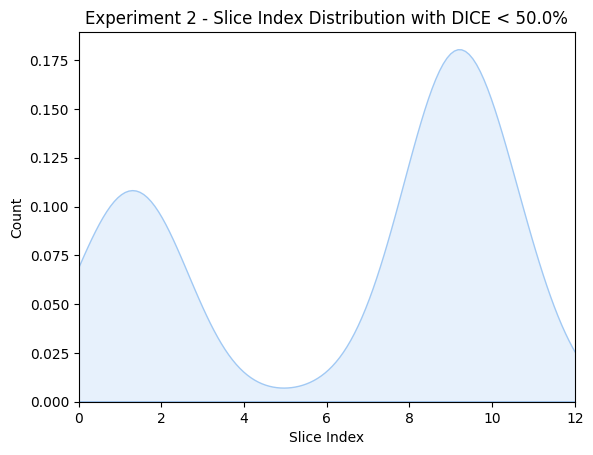

In [93]:
cfg = load(open('configs/ukbb/test/exp2/sex.yaml', 'r'), Loader=Loader)
test_sex_df = pd.read_csv(cfg['results_path'])
print(cfg['model_desc'])
print(cfg['data_desc'])
test_sex_merged_df = merge_results_patients(test_sex_df, patients_df)
res_df = get_all_results(test_sex_merged_df, cfg)
exps_df = pd.concat([exps_df, res_df], ignore_index=True)

Train, test sex controlled. Results per sex groups are similar. Results for white ethnic group is higher than the others due to the large number of samples in the training set. Results for asian group is higher altough the train set has similar numbers. However, test set contains more asian than black.

## Ethnicity Controlled Test Set Results

Unimatch Unet 80 Pretrained on UKBB
UKBB Test Data - Ethnicity Controlled -  108 Patients


Number of Patients: 108
Total number of slices: 2300
DICE Mean: 88.20
RV Mean: 86.14
MYO Mean: 86.35
LV Mean: 92.09


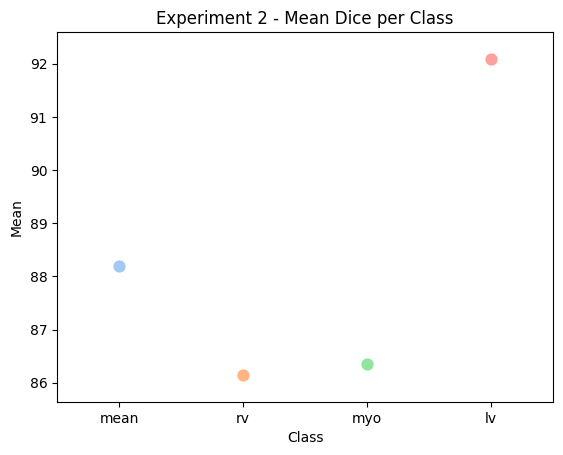

Dice Mean for Male: 88.81
Dice Mean for Female: 87.55


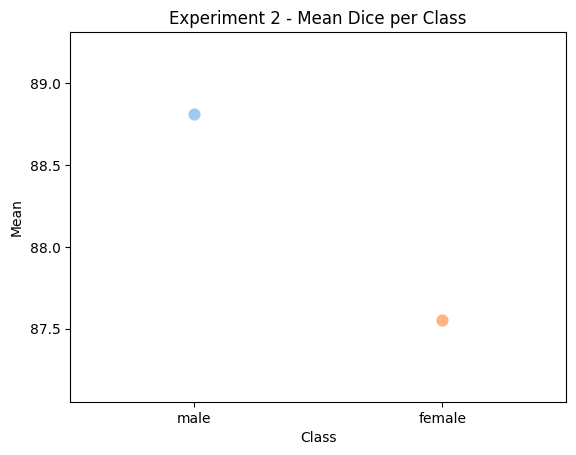

Mean Dice for White:
   ethnicity  dice_mean
0     1001.0  87.449473
1     1003.0  92.132511
Mean: 87.44947343784078
Mean Dice for Asian:
   ethnicity  dice_mean
0     3001.0  88.490951
1     3002.0  88.599065
2     3003.0  91.023190
3     3004.0  90.056745
Mean: 88.49095122499973
Mean Dice for Black:
   ethnicity  dice_mean
0     4001.0  87.484561
1     4002.0  89.383138
2     4003.0  84.909636
Mean: 87.4845613397525


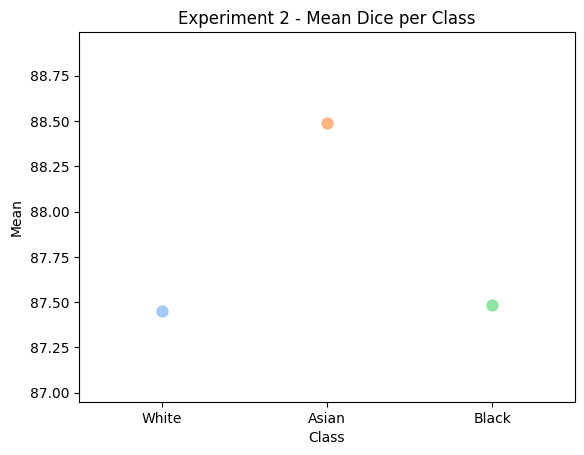

Experiment 2 - Number of slices with DICE < 50.0%: 143


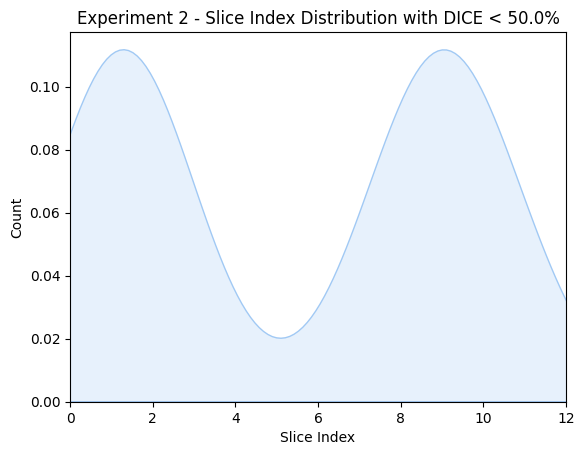

In [94]:
cfg = load(open('configs/ukbb/test/exp2/ethn.yaml', 'r'), Loader=Loader)
print(cfg['model_desc'])
print(cfg['data_desc'])
test_ethn_df = pd.read_csv(cfg['results_path'])
test_ethn_merged_df = merge_results_patients(test_ethn_df, patients_df)
res_df = get_all_results(test_ethn_merged_df, cfg)
exps_df = pd.concat([exps_df, res_df], ignore_index=True)

Train sex controlled, test ethnicity controlled. Performance for males is better although both train, sex have same or similar number of samples per sex group. Performance for Asian group is better although white is more.

# Experiment 3: Ethnicity Controlled Model - 26
## Sex Controlled Test Set Results

Unimatch Unet 26 Pretrained on UKBB
UKBB Test Data - Sex Controlled -  962 Patients
Number of Patients: 962
Total number of slices: 20802
DICE Mean: 85.40
RV Mean: 82.91
MYO Mean: 83.16
LV Mean: 90.12


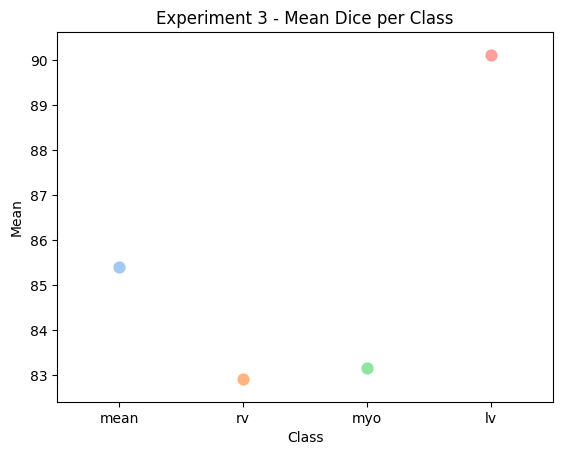

Dice Mean for Male: 85.42
Dice Mean for Female: 85.37


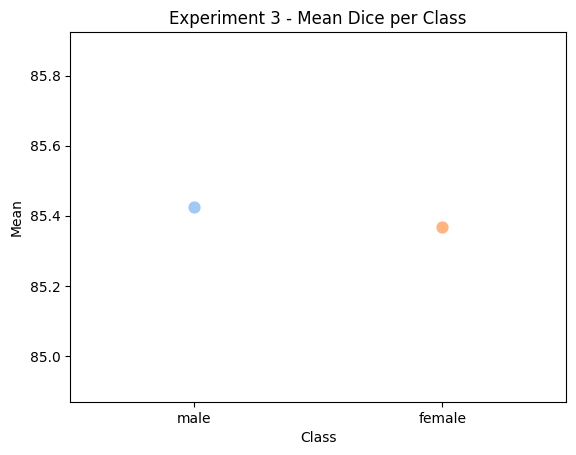

Mean Dice for White:
   ethnicity  dice_mean
0     1001.0  85.640842
1     1002.0  86.269752
2     1003.0  83.837769
Mean: 85.64084241960539
Mean Dice for Asian:
   ethnicity  dice_mean
0     3001.0  84.339575
1     3002.0  84.664688
2     3004.0  85.126591
Mean: 84.33957463165443
Mean Dice for Black:
   ethnicity  dice_mean
0     4001.0  84.480597
1     4002.0  84.042581
2     4003.0  83.432279
Mean: 84.4805972054237


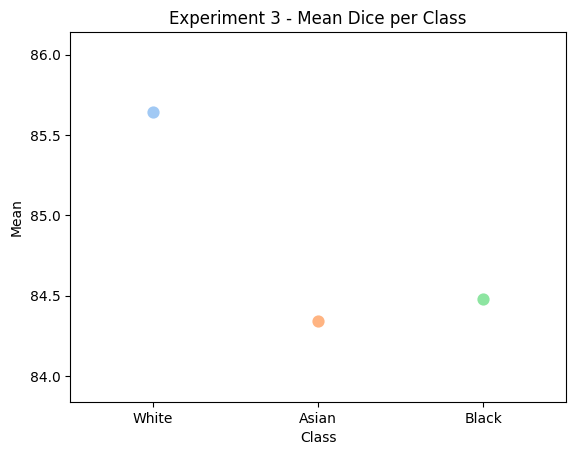

Experiment 3 - Number of slices with DICE < 50.0%: 1647


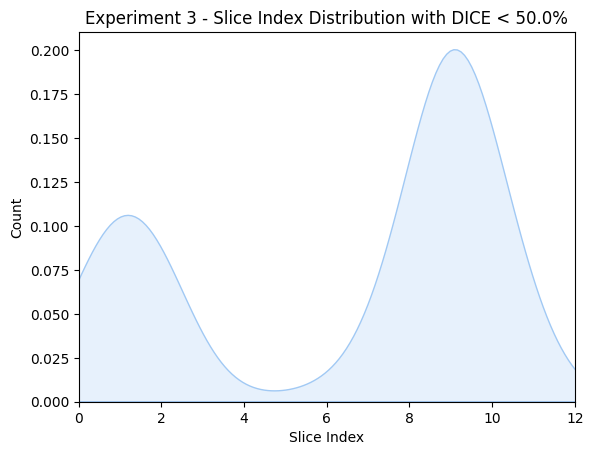

In [95]:
cfg = load(open('configs/ukbb/test/exp3/sex.yaml', 'r'), Loader=Loader)
test_sex_df = pd.read_csv(cfg['results_path'])
print(cfg['model_desc'])
print(cfg['data_desc'])
test_sex_merged_df = merge_results_patients(test_sex_df, patients_df)
res_df = get_all_results(test_sex_merged_df, cfg)
exps_df = pd.concat([exps_df, res_df], ignore_index=True)

Train ethnicity controlled, test sex controlled. Overall performance of the model on this test dataset is low. Performance is similar for sex groups. Performance is better for white ethnic group altough the train set is controlled for ethnicity. However, the test set has more white samples.

## Ethnicity Controlled Test Set Results

Unimatch Unet 26 Pretrained on UKBB
UKBB Test Data - Ethnicity Controlled -  108 Patients
Number of Patients: 108
Total number of slices: 2300
DICE Mean: 84.60
RV Mean: 82.35
MYO Mean: 81.87
LV Mean: 89.58


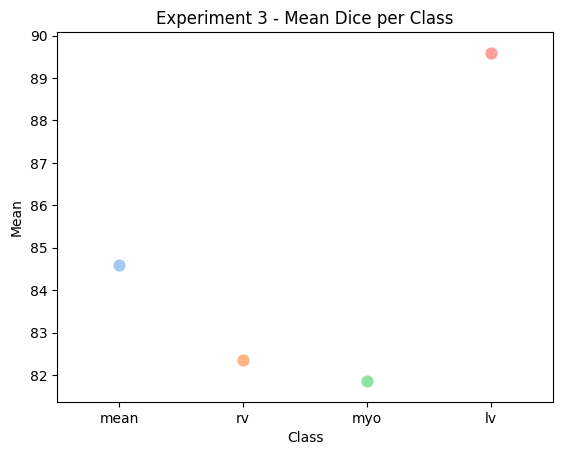

Dice Mean for Male: 85.01
Dice Mean for Female: 84.18


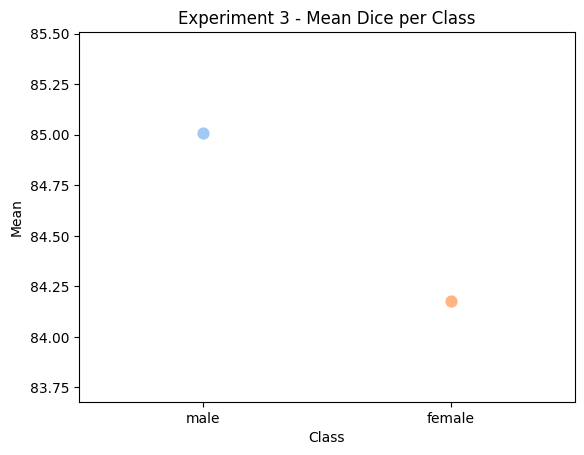

Mean Dice for White:
   ethnicity  dice_mean
0     1001.0  83.984577
1     1003.0  88.705246
Mean: 83.98457743124372
Mean Dice for Asian:
   ethnicity  dice_mean
0     3001.0  83.837729
1     3002.0  86.102200
2     3003.0  87.159613
3     3004.0  88.816999
Mean: 83.83772917388234
Mean Dice for Black:
   ethnicity  dice_mean
0     4001.0  84.022772
1     4002.0  86.124602
2     4003.0  83.432279
Mean: 84.0227719638797


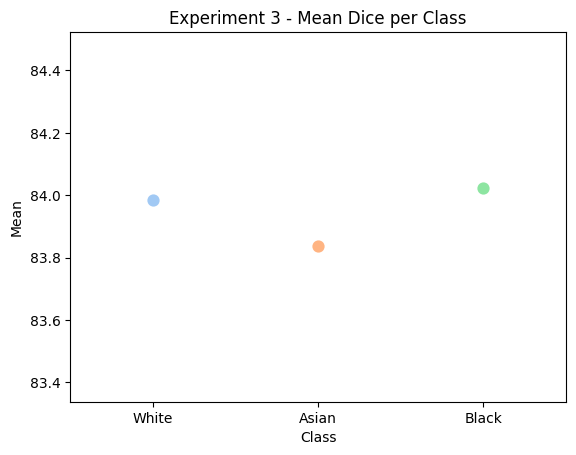

Experiment 3 - Number of slices with DICE < 50.0%: 207


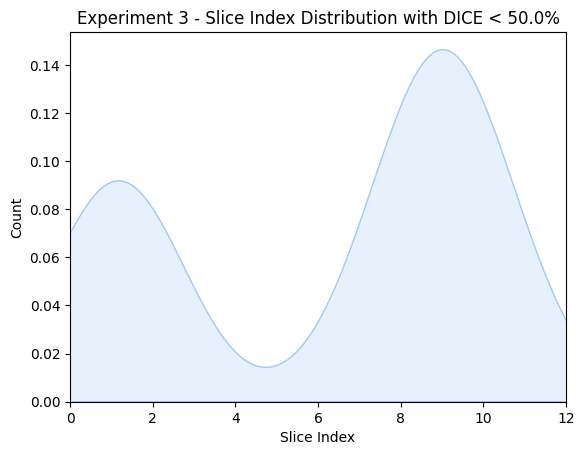

In [96]:
cfg = load(open('configs/ukbb/test/exp3/ethn.yaml', 'r'), Loader=Loader)
print(cfg['model_desc'])
print(cfg['data_desc'])
test_ethn_df = pd.read_csv(cfg['results_path'])
test_ethn_merged_df = merge_results_patients(test_ethn_df, patients_df)
res_df = get_all_results(test_ethn_merged_df, cfg)
exps_df = pd.concat([exps_df, res_df], ignore_index=True)

Train, test ethnicity controlled, Overall performance is low. Performance for male group is higher even though the train contains similar number per sex group. However, asian group contains more males which could contribute to that. Performance per ethnic group is similar. 

# Experiment 4: Sex Ethnicity Controlled Model - 18
## Sex Controlled Test Set Results

Unimatch Unet 18 Pretrained on UKBB
UKBB Test Data - Sex Controlled -  962 Patients
Number of Patients: 962
Total number of slices: 20802
DICE Mean: 83.00
RV Mean: 79.52
MYO Mean: 80.96
LV Mean: 88.51


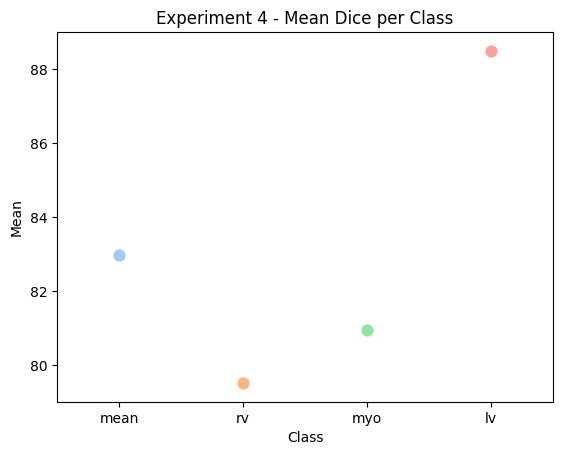

Dice Mean for Male: 83.13
Dice Mean for Female: 82.86


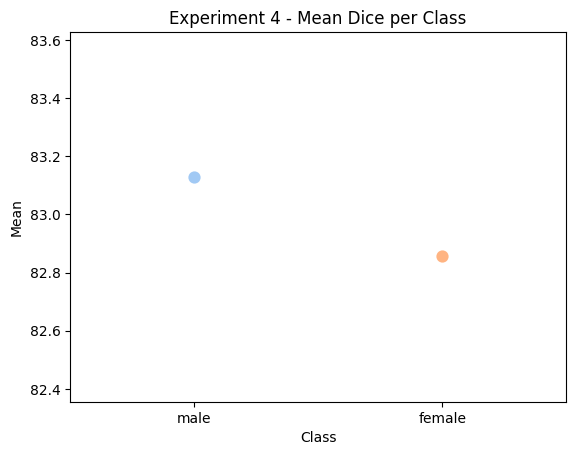

Mean Dice for White:
   ethnicity  dice_mean
0     1001.0  83.307121
1     1002.0  83.864106
2     1003.0  82.199034
Mean: 83.3071206356194
Mean Dice for Asian:
   ethnicity  dice_mean
0     3001.0  81.435921
1     3002.0  81.390775
2     3004.0  82.639082
Mean: 81.43592121779425
Mean Dice for Black:
   ethnicity  dice_mean
0     4001.0  81.401767
1     4002.0  81.636207
2     4003.0  80.881208
Mean: 81.40176670419471


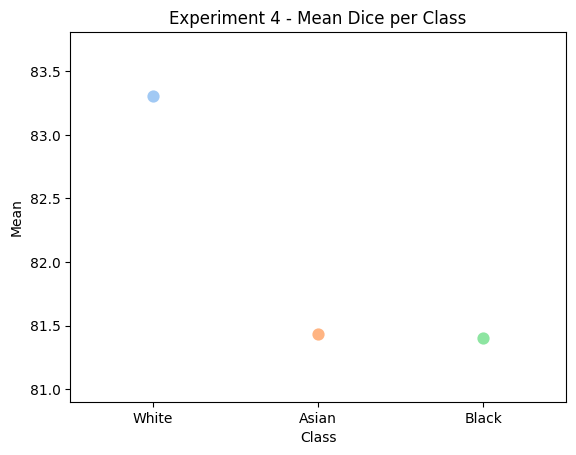

Experiment 4 - Number of slices with DICE < 50.0%: 2060


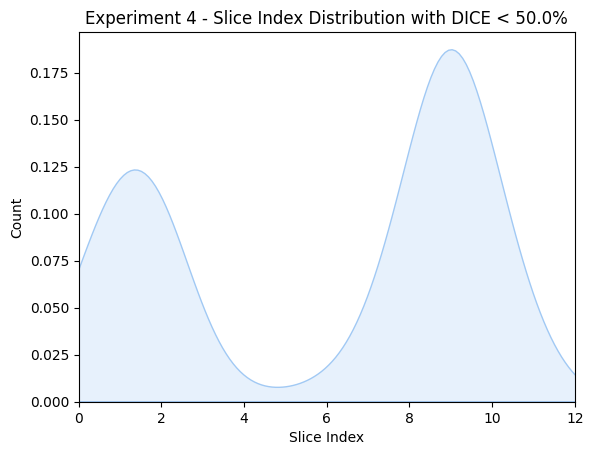

In [97]:
cfg = load(open('configs/ukbb/test/exp4/sex.yaml', 'r'), Loader=Loader)
test_sex_df = pd.read_csv(cfg['results_path'])
print(cfg['model_desc'])
print(cfg['data_desc'])
test_sex_merged_df = merge_results_patients(test_sex_df, patients_df)
res_df = get_all_results(test_sex_merged_df, cfg)
exps_df = pd.concat([exps_df, res_df], ignore_index=True)

Train sex, ethnicity controlled. Test sex controlled. overall perfomance is low, could need more epochs. Sex groups have similar performance. White group performance is higher, altough train is controlled however, test has more white.

## Ethnicity Controlled Test Set Results

Unimatch Unet 18 Pretrained on UKBB
UKBB Test Data - Ethnicity Controlled -  108 Patients
Number of Patients: 108
Total number of slices: 2300
DICE Mean: 81.69
RV Mean: 78.83
MYO Mean: 79.07
LV Mean: 87.18


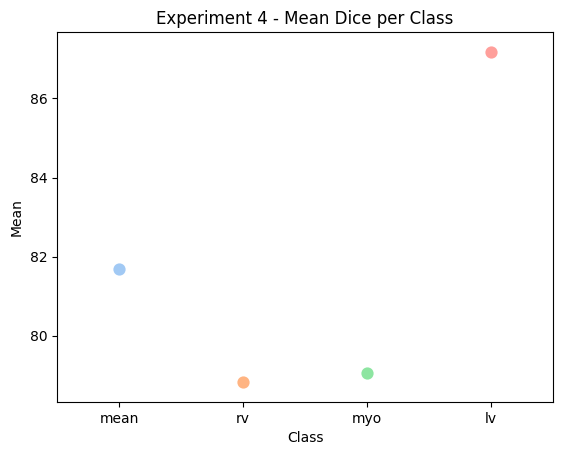

Dice Mean for Male: 82.65
Dice Mean for Female: 80.70


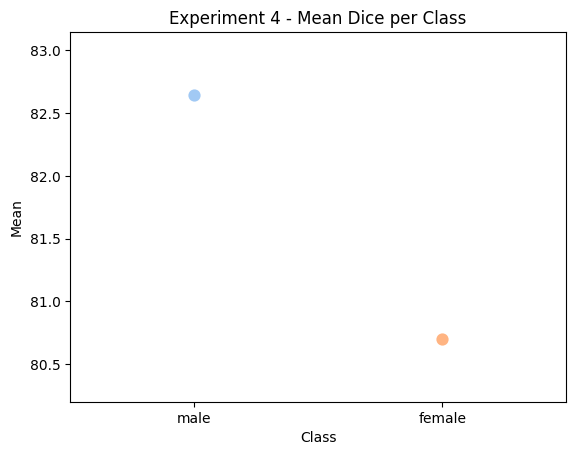

Mean Dice for White:
   ethnicity  dice_mean
0     1001.0  81.023799
1     1003.0  84.890592
Mean: 81.02379912621825
Mean Dice for Asian:
   ethnicity  dice_mean
0     3001.0  80.698685
1     3002.0  83.256254
2     3003.0  81.336977
3     3004.0  86.739228
Mean: 80.69868463926203
Mean Dice for Black:
   ethnicity  dice_mean
0     4001.0  81.272517
1     4002.0  83.594209
2     4003.0  80.881208
Mean: 81.27251711157179


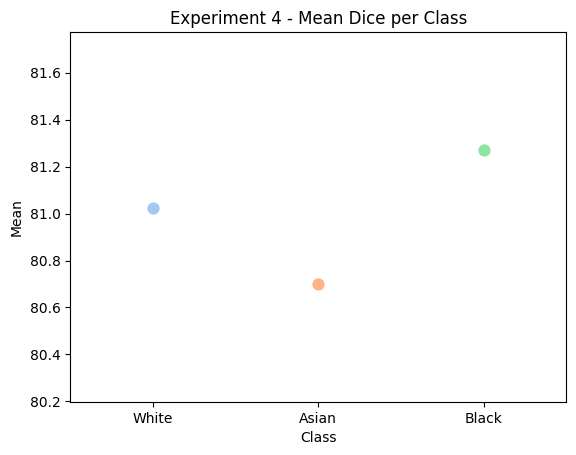

Experiment 4 - Number of slices with DICE < 50.0%: 269


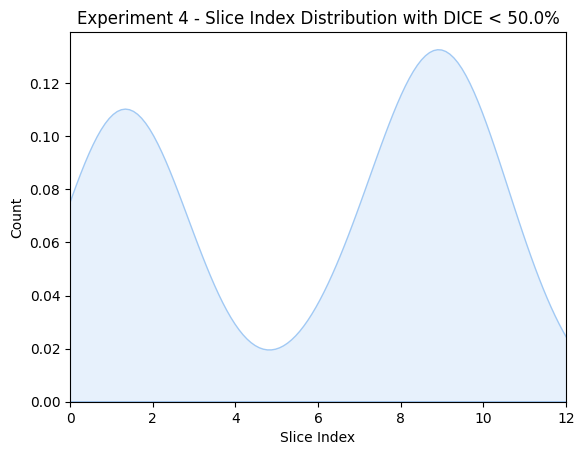

In [98]:
cfg = load(open('configs/ukbb/test/exp4/ethn.yaml', 'r'), Loader=Loader)
print(cfg['model_desc'])
print(cfg['data_desc'])
test_ethn_df = pd.read_csv(cfg['results_path'])
test_ethn_merged_df = merge_results_patients(test_ethn_df, patients_df)
res_df = get_all_results(test_ethn_merged_df, cfg)
exps_df = pd.concat([exps_df, res_df], ignore_index=True)

Train sex, ethnicity controlled. Test ethnicity controlled. overall perfomance is low, could need more epochs. Male has higher performance, although train is controlled and test has similar numbers. Asian group performance is slightly worse although both train, test are controlled.

In [100]:
exps_df

,experiment,model,train_set,test_set,epochs,dice_mean,rv_mean,myo_mean,lv_mean,male_dice,female_dice,white_dice,asian_dice,black_dice,low_scores_prcnt
0,1,unimatch unet,3301,962,57,92.194169,90.823334,90.849408,94.909766,92.190938,92.197605,92.387895,91.027562,91.068725,2.720892
1,1,unimatch unet,3301,108,57,91.106028,89.617494,89.556952,94.143639,91.555495,90.639029,90.748787,90.342943,90.774393,3.652174
2,2,unimatch unet,805,962,100,89.168248,87.014818,87.694738,92.795188,89.236499,89.095679,89.403407,88.419775,87.683266,5.235074
3,2,unimatch unet,805,108,100,88.195250,86.142659,86.349089,92.094001,88.812229,87.554204,87.449473,88.490951,87.484561,6.217391
4,3,unimatch unet,264,962,100,85.397588,82.910287,83.160345,90.122131,85.424276,85.369210,85.640842,84.339575,84.480597,7.917508
5,3,unimatch unet,264,108,100,84.601368,82.351400,81.870668,89.582037,85.007817,84.179065,83.984577,83.837729,84.022772,9.000000
6,4,unimatch unet,182,108,100,82.995354,79.518910,80.960656,88.506497,83.126855,82.855532,83.307121,81.435921,81.401767,9.902894
7,4,unimatch unet,182,108,100,81.690766,78.827142,79.066065,87.179093,82.645402,80.698893,81.023799,80.698685,81.272517,11.695652


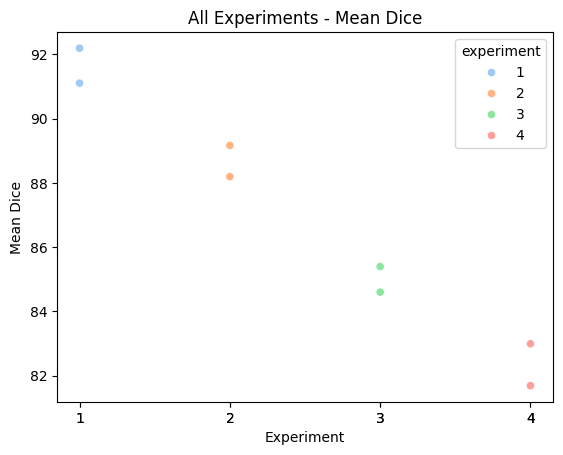

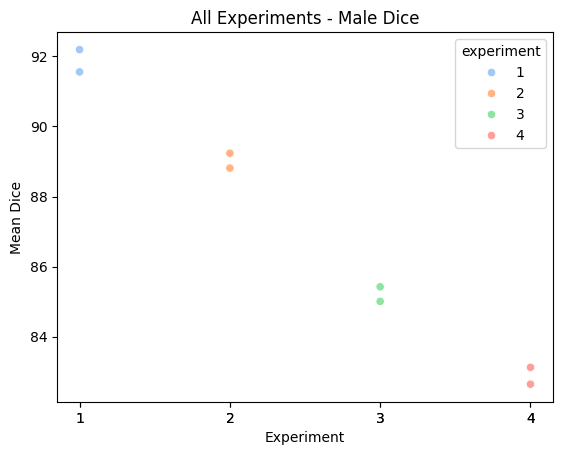

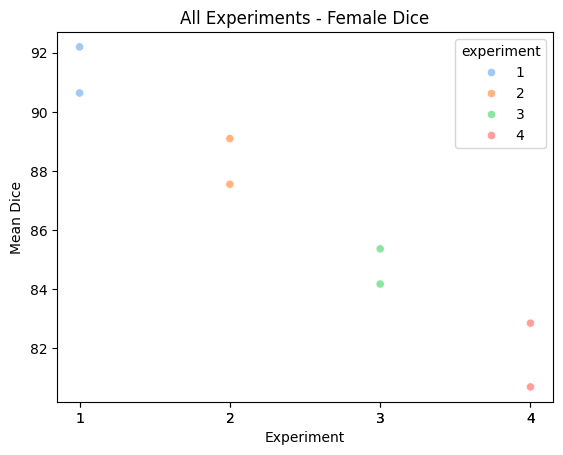

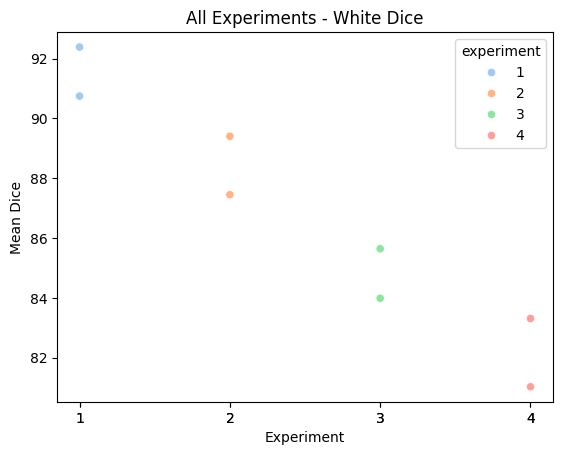

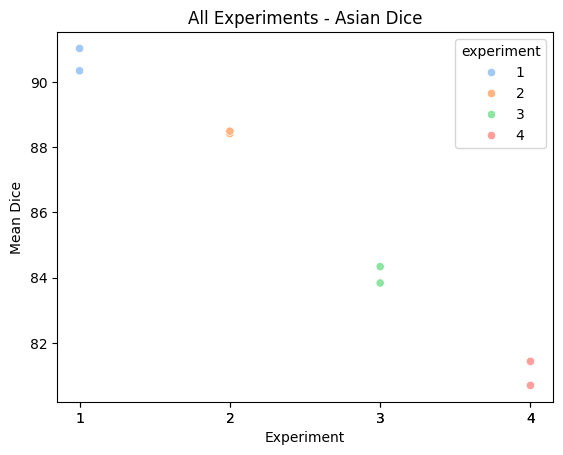

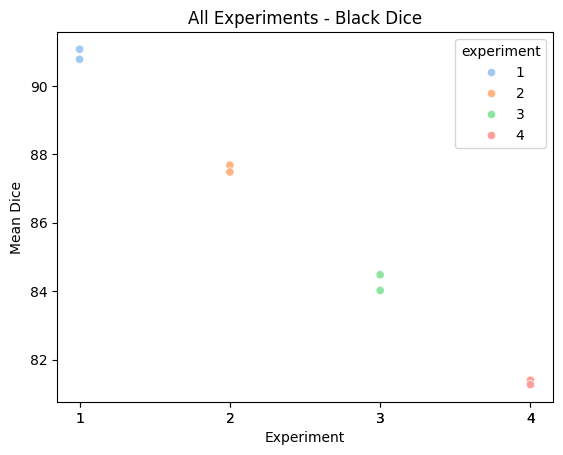

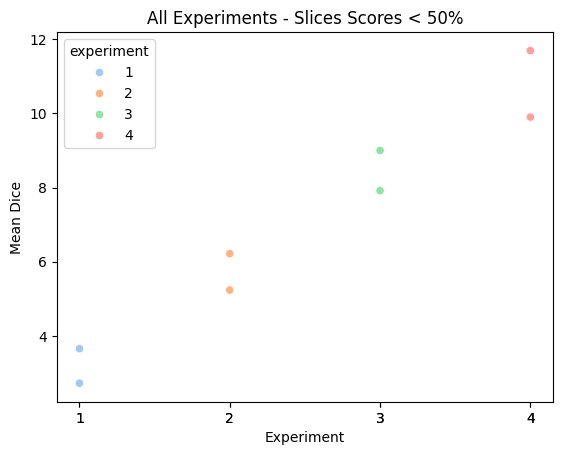

In [140]:
plot_exps(exps_df)